In [13]:
import pycrfsuite
import argparse
import random
from operator import itemgetter
import nltk
from features import sent2labels, sent2features
from active_learning_model import ALModel
from random_sampling_model import RSModel
import import_conll2003
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [14]:
# Create Dataset
labeled_size = 5
pool_size = int(len(list(nltk.corpus.conll2002.iob_sents('esp.train'))))
test_size = int(len(list(nltk.corpus.conll2002.iob_sents('esp.testb'))))

In [ ]:
# Convert sentence to features
X_labeled = [sent2features(s) for s in labeled_sents]
y_labeled = [sent2labels(s) for s in labeled_sents]
X_pool = [sent2features(s) for s in pool_sents]
y_pool = [sent2labels(s) for s in pool_sents]
X_test = [sent2features(s) for s in test_sents]
y_test = [sent2labels(s) for s in test_sents]

In [ ]:
# Training
al_model = ALModel(X_labeled, y_labeled, X_pool, y_pool, 5)
rs_model = RSModel(X_labeled, y_labeled, X_pool, y_pool, 5)

al_score = []
rs_score = []
print("al_model", al_model.evaluation(X_test, y_test))
print("rs_model", rs_model.evaluation(X_test, y_test))
#print("--------------------------------------------")
al_score.append(al_model.evaluation(X_test, y_test))
rs_score.append(rs_model.evaluation(X_test, y_test))
for _ in range(150):
    al_model.query_selection()
    al_model.fit()
    #print("al_model", al_model.evaluation(X_test, y_test))
    al_score.append(al_model.evaluation(X_test, y_test))
    rs_model.query_selection()
    rs_model.fit()
    #print("rs_model", rs_model.evaluation(X_test, y_test))
    rs_score.append(rs_model.evaluation(X_test, y_test))
    #print("--------------------------------------------")

In [9]:
al_score = [0.0087269106035465244, 0.26633893035970163, 0.31149049575476867, 0.35957621307072851, 0.46965666093188208, 0.49766770937489457, 0.49532790978375218, 0.52228161802083639, 0.52404134337212882, 0.53589650915217213, 0.53580143179990625, 0.56299864740276362, 0.57033254761893082, 0.58840558126765019, 0.5957884043988424, 0.59364716184400457, 0.58959601340043899, 0.58792353311443102, 0.59579097492544664, 0.59894499122000699, 0.60718398177050936, 0.6108022321100175, 0.61610776860135041, 0.61854991530705128, 0.62681856682369141, 0.62855399202566353, 0.63187793913224555, 0.63036884306472241, 0.63327304952390295, 0.63620994972189537, 0.63272599829607312, 0.63890572683790825, 0.63543376133173357, 0.63982404543627547, 0.64476044942813915, 0.65052653746705191, 0.65138613583707361, 0.6553292933493321, 0.65315127422462893, 0.64844281678762072, 0.6536472977578176, 0.65698532680928845, 0.65814716518024496, 0.65983106183651208, 0.66144519074187758, 0.66102803115355113, 0.663484888161463, 0.66424585890831278, 0.66323058332075358, 0.66027591282350062, 0.66257435605395076, 0.66129183081726484, 0.66252728881302902, 0.66289247537715779, 0.66568384956009885, 0.6682494469046163, 0.66723594817092058, 0.66525977388847246, 0.66987630684037547, 0.67025429107665946, 0.67109280736697319, 0.67639828898512522, 0.68121131325835826, 0.6804902919740683, 0.67978489796727526, 0.67874423393926497, 0.67758696327465862, 0.67171707398430813, 0.67246901722342534, 0.67539086999624542, 0.67623102161457371, 0.67679389145746394, 0.67950999773994347, 0.68134104688733765, 0.68046755995139863, 0.68116703967303305, 0.68770956566072106, 0.68957707345343067, 0.69405654756539603, 0.69446432724390184, 0.69581267468662178, 0.69585351314734589, 0.69303088748120123, 0.69441421331235054, 0.69349555519767259, 0.69451076712719739, 0.69352948927716362, 0.69471104539299289, 0.6925424215436663, 0.69421259882538144, 0.70063551304691596, 0.70112132238907476, 0.70003371487145671, 0.7043006225225048, 0.70496246350016256, 0.70525882430899256, 0.70505868462768628, 0.70618040383649772, 0.70802560137521808, 0.70998017268810143, 0.70921220487136261, 0.71021446130923993, 0.71319203847310997, 0.71302560770735968, 0.71360591414865915, 0.71030697296205791, 0.71526600849342958, 0.71492017598632818, 0.71081799490594855, 0.70973933220806329, 0.70991244700589617, 0.70867524959077921, 0.70901957549025318, 0.70822438780721708, 0.70736521071617797, 0.70569058687675057, 0.70661431608449399, 0.70779273216737915, 0.70617108238515058, 0.71059971461169869, 0.71310521302431928, 0.71587919924746723, 0.71867873341558441, 0.71542876513629239, 0.71321077531510102, 0.71248731718758496, 0.71223482302985952, 0.71115666410121836, 0.71424131866365159, 0.71535317347205929, 0.71541700392583618, 0.71748717173975574, 0.71574995498680605, 0.71753390887043234, 0.71846180853741692, 0.72126561128927236, 0.72793287617359859, 0.72711317151845978, 0.72636117714328952, 0.72650364267838341, 0.72705369588856017, 0.72976249065814935, 0.7310678260568646, 0.72953452194083934, 0.72609243590955996, 0.72961858112996403, 0.72918347196002831, 0.72696789829679931, 0.72952118032082192, 0.7299878460409025, 0.72974771218823964]
rs_score = [0.0087269106035465244, 0.12023590927030499, 0.24437020048536268, 0.27805311621242879, 0.28186512462042695, 0.28561912658899297, 0.32336580601150322, 0.37141308562054909, 0.41511794383197242, 0.43246280551429811, 0.46202219467730332, 0.51438035374298829, 0.51824746740884853, 0.52540714898147012, 0.52459266306864305, 0.52059694382598454, 0.53319233865386551, 0.53536710763831563, 0.53012390744340732, 0.53478623296161421, 0.53951177603933476, 0.54191934934124031, 0.53748893445834678, 0.53273335453671755, 0.53930226249231727, 0.54444760995307784, 0.54327636723288042, 0.54141495638890214, 0.54405770948745091, 0.55041468676861105, 0.55927936522265453, 0.55852576938734266, 0.56055382475718785, 0.56256295830570502, 0.56475260881913547, 0.56475861643893843, 0.56543575993135065, 0.56478903304631767, 0.56347810143878208, 0.57233446233423857, 0.56295185794976099, 0.57014900546395131, 0.57472848287876377, 0.57844478060441507, 0.57877478945390992, 0.5786767205655039, 0.58036889780937873, 0.57822660422640082, 0.57861182416111268, 0.57887600780488191, 0.58180728584869401, 0.5844952784613725, 0.58247849749113778, 0.58498140450946678, 0.58700113373391727, 0.58830881047705608, 0.58998556763070475, 0.59780300826051835, 0.5979939764984592, 0.59818940714043312, 0.59776607877639742, 0.5947725241118248, 0.59705482820193811, 0.59784578347736617, 0.59356984044889582, 0.59980596228375049, 0.5950869344161771, 0.59366630185522762, 0.59545205902438247, 0.59945208022153795, 0.60043444605065233, 0.60100063098720558, 0.60444751490907089, 0.60306044819871862, 0.60621271487310602, 0.60848149233956317, 0.6091537612700233, 0.60669165612856324, 0.60629228312198447, 0.60897794434585051, 0.60988558905068624, 0.60872423418791688, 0.61115686810479808, 0.61760018959343865, 0.6166505273454912, 0.61918185962487904, 0.61862327602831357, 0.61796741023620894, 0.61802969636639116, 0.61775411178580608, 0.62230325293909428, 0.62366572735937675, 0.62522187163831044, 0.62405784620424787, 0.62479341556853296, 0.62422749815831668, 0.62315532978654542, 0.62649332354191944, 0.62289549098345853, 0.62200687883778372, 0.61948779191255687, 0.6202288797436365, 0.61766352871808294, 0.62180268640552028, 0.62131889274289864, 0.6236213768038612, 0.62405235079872579, 0.62764063187490238, 0.62924256273680779, 0.63203848001813778, 0.64172652423370524, 0.64033496932553557, 0.64593818019254878, 0.64463720554823289, 0.64185173111921945, 0.64776870451067137, 0.64723911325603889, 0.64976628244738088, 0.64852292120033128, 0.64441450269135758, 0.64327980295296561, 0.64414266662121766, 0.64460649994316677, 0.64230776100835041, 0.6428154572196314, 0.64085046800648759, 0.64166340122544363, 0.63889647549188289, 0.64154868309527557, 0.64108146700203561, 0.6427091636739336, 0.64074388549459427, 0.6400925259793695, 0.64050682258114788, 0.63939260007320864, 0.63964814421048544, 0.63937467427461148, 0.64041875657211611, 0.6432624355678368, 0.64967146958386268, 0.64853123565952353, 0.64893954739225612, 0.65067324226911105, 0.64910702322665637, 0.64911289951253681, 0.65114394747986581, 0.65128273584835772, 0.65143640142087045, 0.65201553074050866, 0.6526051239932793, 0.65385757832172109]

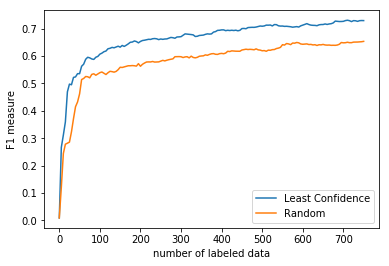

In [16]:
left = np.arange(len(rs_score)) * 5
p1 = plt.plot(left, al_score)
p2 = plt.plot(left, rs_score)
plt.xlabel("number of labeled data")
plt.ylabel("F1 measure")
plt.legend((p1[0], p2[0]), ("Least Confidence", "Random"), loc=4)